# Driver distraction using Convolutional Neural Networks

### Libraries

In [1]:
import os
from os.path import join
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

### Model

In [2]:
cnnmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
cnnmodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 49, 49, 64)        2

### Data preprocessing

In [3]:
workingdir = os.path.abspath('')
trainingdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/train/')

### Train and validation dataset split

In [4]:
trainingdataimage = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, 
                                       height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, 
                                       horizontal_flip = True, fill_mode = 'nearest', validation_split = 0.2)
trainingset = trainingdataimage.flow_from_directory(trainingdirectory, 
                                                            target_size = (100, 100), batch_size = 64, 
                                                            class_mode = 'categorical', subset = 'training', shuffle = True)
validationset = trainingdataimage.flow_from_directory(trainingdirectory, 
                                                            target_size = (100, 100), batch_size = 64, 
                                                            class_mode = 'categorical', subset = 'validation', shuffle = True)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


### Model fit

In [5]:
history =  cnnmodel.fit(trainingset, epochs = 60, steps_per_epoch = len(trainingset), 
                             validation_data = validationset, verbose = 1, validation_steps = len(validationset))

Epoch 1/60
281/281 [==============================] - 114s 391ms/step - loss: 2.3757 - accuracy: 0.1876 - val_loss: 9.6513 - val_accuracy: 0.1033
Epoch 2/60
281/281 [==============================] - 110s 389ms/step - loss: 1.7734 - accuracy: 0.3377 - val_loss: 2.3622 - val_accuracy: 0.2540
Epoch 3/60
281/281 [==============================] - 110s 391ms/step - loss: 1.4419 - accuracy: 0.4602 - val_loss: 1.5239 - val_accuracy: 0.4300
Epoch 4/60
281/281 [==============================] - 109s 389ms/step - loss: 1.1783 - accuracy: 0.5696 - val_loss: 1.1394 - val_accuracy: 0.5876
Epoch 5/60
281/281 [==============================] - 110s 390ms/step - loss: 0.9663 - accuracy: 0.6582 - val_loss: 1.4248 - val_accuracy: 0.5242
Epoch 6/60
281/281 [==============================] - 110s 392ms/step - loss: 0.7862 - accuracy: 0.7288 - val_loss: 0.9391 - val_accuracy: 0.6800
Epoch 7/60
281/281 [==============================] - 110s 390ms/step - loss: 0.6675 - accuracy: 0.7702 - val_loss: 1.0366 -

Epoch 57/60
281/281 [==============================] - 115s 409ms/step - loss: 0.1307 - accuracy: 0.9595 - val_loss: 0.4642 - val_accuracy: 0.9016
Epoch 58/60
281/281 [==============================] - 115s 410ms/step - loss: 0.1422 - accuracy: 0.9569 - val_loss: 0.2760 - val_accuracy: 0.9177
Epoch 59/60
281/281 [==============================] - 115s 408ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.3813 - val_accuracy: 0.9027
Epoch 60/60
281/281 [==============================] - 115s 407ms/step - loss: 0.1243 - accuracy: 0.9631 - val_loss: 0.2915 - val_accuracy: 0.9223


### Plot to show training accuracy vs validation accuracy

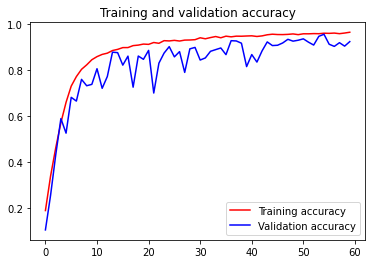

<Figure size 432x288 with 0 Axes>

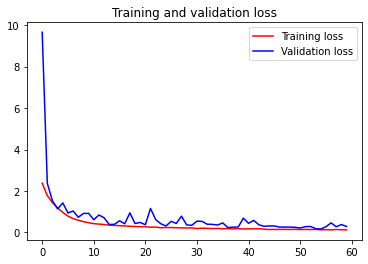

<Figure size 432x288 with 0 Axes>

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

### Test data prediction

In [49]:
testparentdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/')
testdataimage = ImageDataGenerator(rescale = 1./255)
testdata = testdataimage.flow_from_directory(testparentdirectory, classes=['test'], target_size = (100,100))
testoutput = cnnmodel.predict(testdata, verbose = 1)

Found 79726 images belonging to 1 classes.
2492/2492 [==============================] - 247s 99ms/step


### Preparing output dataframe

In [50]:
specimencsv = pd.read_csv(os.path.join(workingdir + '/state-farm-distracted-driver-detection/sample_submission.csv'))
result = {'img':list(specimencsv.values[:,0]),}
for value in range(0,10):
    result['c' + str(value)] = list(testoutput[:,value])

In [53]:
testoutput = pd.DataFrame(result)

### Exploratory data analysis

Text(0.5, 1.0, 'Number of images per class in training data')

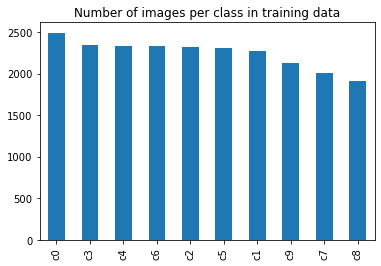

In [57]:
imagescsv = pd.read_csv(os.path.join(workingdir + '/state-farm-distracted-driver-detection/driver_imgs_list.csv'))
imagescsv.classname.value_counts().plot(kind = 'bar', label = 'index')
plt.title('Number of images per class in training data')

### Preparing output file

In [60]:
testoutput.to_csv('Testoutput.csv', index = False, encoding='utf-8')